In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.model_selection import train_test_split

In [30]:
train_data = pd.read_csv('./fashion_mnist/fashion-mnist_train.csv')
test_data = pd.read_csv('./fashion_mnist/fashion-mnist_test.csv')

In [31]:
# tensorflow and keras cannot deal w/ pandas dataframes
# so we format them as numpy arrays

train_data = np.array(train_data, dtype='float32')
test_data = np.array(test_data, dtype='float32')

In [32]:
# the first column is the classification, the rest are pixels

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

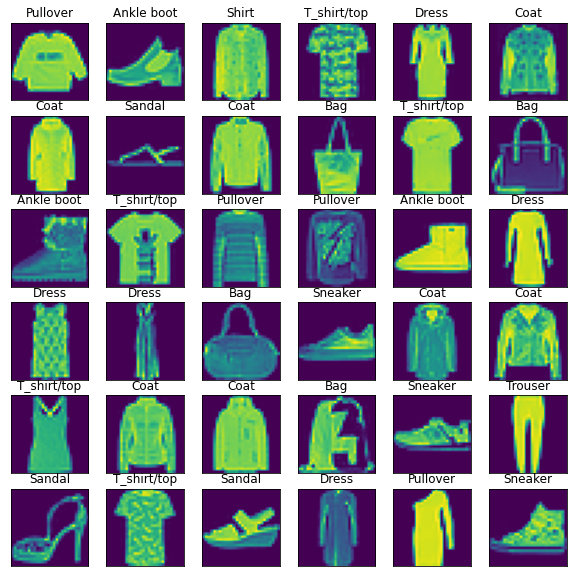

In [33]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()


In [51]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

In [35]:
image_shape = (28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *image_shape)

In [39]:
# initialize model
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax'),
])

In [40]:
#compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.002), metrics=['accuracy'])

In [44]:
# fit the model to the data (training step)
history = model.fit(
    x_train,
    y_train,
    batch_size=2048,
    epochs=10,
    verbose=1,
    validation_data=(x_validate, y_validate)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 174s 4ms/sample - loss: 0.3653 - acc: 0.8751 - val_loss: 0.2771 - val_acc: 0.8978
Epoch 2/10
48000/48000 [==============================] - 176s 4ms/sample - loss: 0.3445 - acc: 0.8857 - val_loss: 0.2692 - val_acc: 0.8992
Epoch 3/10
48000/48000 [==============================] - 173s 4ms/sample - loss: 0.3307 - acc: 0.8878 - val_loss: 0.2553 - val_acc: 0.9058
Epoch 4/10
48000/48000 [==============================] - 173s 4ms/sample - loss: 0.3064 - acc: 0.8967 - val_loss: 0.2586 - val_acc: 0.9066
Epoch 5/10
48000/48000 [==============================] - 172s 4ms/sample - loss: 0.3002 - acc: 0.8981 - val_loss: 0.2460 - val_acc: 0.9128
Epoch 6/10
48000/48000 [==============================] - 171s 4ms/sample - loss: 0.2862 - acc: 0.9043 - val_loss: 0.2487 - val_acc: 0.9116
Epoch 7/10
48000/48000 [==============================] - 173s 4ms/sample - loss: 0.2742 - acc: 0.9079 - val_l

Text(0.5, 1.0, 'Training Accuracy')

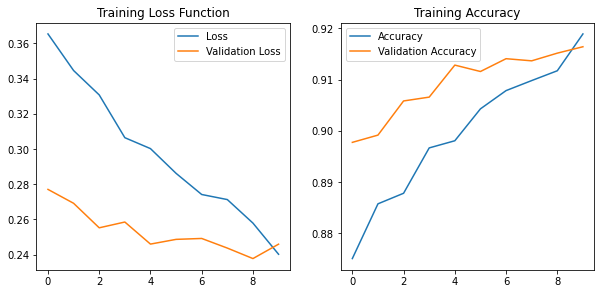

In [45]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training Loss Function')

plt.subplot(2,2,2)
plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Training Accuracy')

In [47]:
predicted_classes = model.predict_classes(x_test)

(10000,)


In [50]:
print(sum(predicted_classes == y_test) / len(y_test))

0.9178


In [52]:
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 8s 790us/sample - loss: 0.2374 - acc: 0.9178
[0.23744823639690876, 0.9178]
